**Note to grader:** Each question is assigned with a score. The final score  will be (sum of actual scores)/(sum of maximum scores)*100. The grading rubrics are shown in the TA guidelines.

# **Assignment 2**

This assignment walks you through the basics of the perceptron. You will also do some first experiments on a toy data set, and check the effect of hyperparameters. The intended goal of the assignment is to familiarize you further with the Jupyter/Colab environment and help you acquire some tools that we will later use to experiment with 'professional-grade' data sets and algorithms.


<b>Note: </b> You must run/evaluate all cells. <b>Order of cell execution is important.<b>

## Preparation Steps

In [1042]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [1043]:
# Load data
from sklearn import datasets

# load iris dataset
iris = datasets.load_iris()
# Since this is a bunch, create a dataframe
df=pd.DataFrame(iris.data)
df['4']=iris.target
# {0:'setosa', 1:'versicolor', 2:'virginica'}
# df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'target']


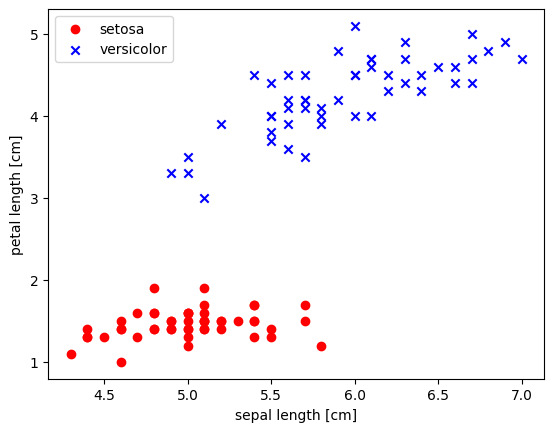

In [1044]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 0, -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

-----------------------
-----------------------
-----------------------



## <font color='#008DFF'> **Question 0. Manual Perceptron Training (10 points)**

Below you can see the first 5 data points of the data set, all labeled as 'setosa'.

In [1045]:
X[0:5], y[0:5]

(array([[5.1, 1.4],
        [4.9, 1.4],
        [4.7, 1.3],
        [4.6, 1.5],
        [5. , 1.4]]),
 array([-1, -1, -1, -1, -1]))

Suppose the initial weights of the perceptron are w0=0.1, w1=0.2, w2=-0.1 . Here $w_0$ is the bias.

In the following space (Double click this text), write the weights after processing data points 0,1,2, and show your calculations (with $\eta = 0.1$):

w0 + w1 x1 + w2 x2 = 0.1 + 0.2*5.1 - 0.1*1.4

Weights formula 
w2 := w2 + \eta(y - y_hat)*x2
w1 := w1 + \eta(y - y_hat)*x1
w0 := w0 + \eta(y - y_hat)

eta = learning rate - how fast perceptron converges to the line that separates the classes

datapoint 0 : [5.1, 1.4]
w0 + (w1)(x1) +(w2)(x2) =
0.1 + (0.2)(5.1) + (-0.1)(1.4) = 0.98 (y_hat = 1)

PREDICTION INCORRECT, UPDATE WEIGHTS
weights:
new w2 = -0.1 + 0.1(-1 - 1) * 1.4 = -0.38
new w1 = 0.2 + 0.1(-1 - 1) * 5.1 = -10
new w0 = 0.1 + 0.1(-1 - 1) = -0.1

datapoint 1: [4.9, 1.4]

Testing weights: 
w0 + (w1)(x1) +(w2)(x2) = 
-0.1 + (-10)(4.9) + (-0.38)(1.4) = -49.632 (y_hat = -1)

PREDICTION CORRECT, DONT CHANGE WEIGHTS
weights:
new w2 = -0.38 + 0.1(-1 + 1) * 1.4 = -0.38
new w1 = -10 + 0.1(-1 + 1) * 4.9 = -10
new w0 = -0.1 + 0.1(-1 + 1) = -0.1

datapoint 2: [4.7,1.3]

Testing weight:
-0.1 + (-10)(4.7) + (-0.38)(1.3) = -47.594 (y_hat = -1)

PREDICTION CORRECT, DONT CHANGE WEIGHTS
weights:
new w2 = -0.38 + 0.1(-1 + 1) * 1.3 = -0.38
new w1 = -10 + 0.1(-1 + 1) * 4.7 = -10
new w0 = -0.1 + 0.1(-1 + 1) = -0.1

<br>
<br>
<br><br><br><br>


In [1046]:
# Grader's area
import numpy as np
maxScore = 0

maxScore += 10
# acturalScore +=

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 1. Perceptron Code Modification (15 points)**

The following code is a perceptron implementation (with three do-nothing lines 59-61).

In [1047]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta # learning rate
        self.n_iter = n_iter
        self.random_state = random_state

        # -=-=--=-=--==--=-=-=-=-=-==- MY CODE -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
        self.iters_passed = 0
        # keep track of weights
        self.weights_history = []
        # -=-=--=-=--==--=-=-=-=-=-==--=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            
            # xi (array) is a row representing an entry (with all its columns / features)
            # target (int) is the target value for the given entry. 
            for xi, target in zip(X, y):
                
                #  self.predict is an ndarray of 1 and -1. depending on prediction.

                # calculates weights for each row and its features
                # target - self.predict(xi) is the error for the current entry
                update = self.eta * (target - self.predict(xi))

                # Update weights to each column if needed 
                self.w_[1:] += update * xi

                #update bias 
                self.w_[0] += update

                # add to error if update doesnt equal 0 .
                # error will be zero if there is no update to be done.
                errors += int(update != 0.0)

                # -=-=--=-=--==--=-=-=-=-=-==- MY CODE -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
                # check if need to iterate more by checking if the weights predict correctly for given data.
                ##if(self.predict(xi) == target): return
                # -=-=--=-=--==--=-=-=-=-=-==--=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

                
                
            self.errors_.append(errors)

            # -=-=--=-=--==--=-=-=-=-=-==- MY CODE -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

            # Check the previous weight, if it is the same to current weight, then stop iterating.
            if(self.weights_history and self.w_.tolist() == self.weights_history[-1]): break;
            
            # Keep track of number of iterations
            self.iters_passed += 1 
            
            # Keep track of history of weights
            self.weights_history.append(self.w_.tolist())
            # -=-=--=-=--==--=-=-=-=-=-==--=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
            
            LW = 2020
            

        # -=-=--=-=--==--=-=-=-=-=-==- MY CODE -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
        # print number of iterations
        
        print(f"Number of iterations passed: {self.iters_passed}")
        print('\n')
        
        # print history of weights
        
        print("Weight number \t\t   Bias \t\t    w1 \t\t      w2")
        [print(f"Weight {i}:\t{w}") for i,w in enumerate(self.weights_history)]
        # -=-=--=-=--==--=-=-=-=-=-==--=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
        return self

    # Returns the dot product of the weighted sums, the input, and bias (aka z)
    # this is the predicted value
    def net_input(self, X):
        """Calculate net input"""
        # dot(X, self.w_[1:]) is the dot prod of all inputs with weights
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # Converts predicted value to either 1 or -1
    def predict(self, X):
        """Return class label after unit step"""
        # returns array where if z greater than or equal to zero, assigns 1, else 0
        return np.where(self.net_input(X) >= 0.0, 1, -1)



Work on the above cell and modify the code so that:

(i) The fit function stops when no more iterations are necessary. <br>
(ii) The trained perceptron contains as an attribute not only its weights, but also the number of iterations it took for training <br>
(iii) The perceptron maintains a history of its weights, i.e. the set of weights after each point is processed.

To modify the code please insert your code with clear comments surrounding it, similarly to "my do-nothing code". Make sure you evaluate the cell again,  so that following cells will be using the modified perceptron.



In [1048]:
# Grader's area

maxScore += 15
# acturalScore +=

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question2: Experimenting with hyperparameters (15 points)**

Number of iterations passed: 39


Weight number 		   Bias 		    w1 		      w2
Weight 0:	[-0.0031675784740547034, 0.005373331727736705, -0.017101960956684533]
Weight 1:	[-0.0023875784740547013, 0.01015533172773671, -0.013305960956684534]
Weight 2:	[-0.002687578474054702, 0.009347331727736713, -0.011753960956684543]
Weight 3:	[-0.002987578474054703, 0.008521331727736715, -0.010249960956684552]
Weight 4:	[-0.0032675784740547036, 0.007745331727736716, -0.008831960956684558]
Weight 5:	[-0.0035475784740547044, 0.006859331727736718, -0.0076059609566845625]
Weight 6:	[-0.003787578474054705, 0.006099331727736721, -0.006503960956684567]
Weight 7:	[-0.004007578474054706, 0.005365331727736723, -0.005543960956684566]
Weight 8:	[-0.004207578474054706, 0.004695331727736724, -0.004667960956684566]
Weight 9:	[-0.0043875784740547066, 0.0040853317277367235, -0.0039179609566845665]
Weight 10:	[-0.004527578474054707, 0.003653331727736724, -0.003221960956684567]
Weight 11:	[-0.004667578474054707, 0.00321733

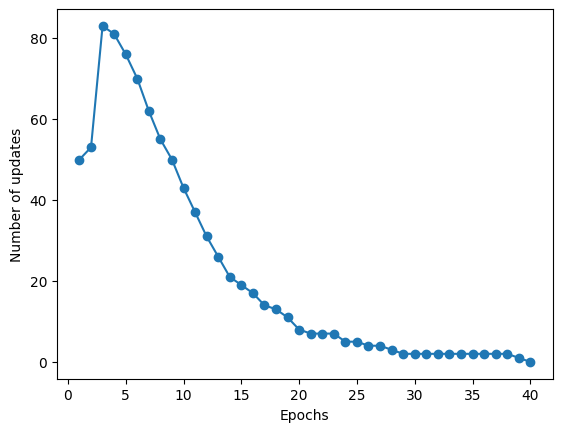

In [1049]:
ppn = Perceptron(eta=.00001, n_iter=1000, random_state=2)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()


Running the above code, you can verify if your modification in question 1 works correctly. The point of this question is to experiment with the different hyperparameters. Here are some specific questions:<br>
(i) Find the largest value of $\eta$ for which the process takes more than 20 iterations to converge. Explain how you found that $\eta$ <br>
(ii) Are you able to find $\eta>1$ for which the process fails to converge in less than 30 iterations? <br>
(iii) Find two different settings for the random state, that give different convergence patterns, for the same $\eta$.

Please give your answers in the cell below.

<br>Double click here to type your answer
<br>
<br>
<br>
<br>

1. the largest value for learning rate that takes more than 20 iterations to converge is 0.000045.I found that by plugging in numbers, as increasing the learning rate would generally lead to faster conversion, and decreasing it would lead to slower conversion. Also increasing the max iterations past 20 to observe the change in learning rate past 20.


2. Yes. If the learning rate is too large, it can cause it to repeatedly overshoot over and over again to the point where it doesnt converge for the optimal weights. Increasing the learning rate to a really high number makes the weights seem like nonsense.


3. For random state 1 and random state 2, the convergence patterns look different for the eta 0.00001. In random state 1, it looks like the number of updates always goes down as epoch increases. Whereas for random state 2, the number of updates goes up briefly in the beginning and then back down.



In [1050]:
# Grader's area

maxScore += 15
# acturalScore +=

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 3: Visualizing multiple decision regions over time (10 points)**

Here is the function for visualizing decision regions

In [1051]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

/var/folders/v6/pwj1f55s6717cq1w1lh4fjkw0000gn/T/ipykernel_28299/2498697379.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


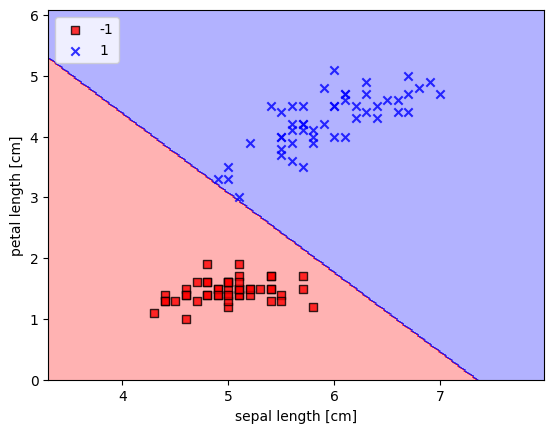

In [1052]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

Using the above, give code that plots the decision regions for the first 5 epochs. Use learning rate = 0.01 and random seed = 1 when applicable.

Number of iterations passed: 5


Weight number 		   Bias 		    w1 		      w2
Weight 0:	[0.03624345363663242, 0.13388243586349927, 0.08871828247736545]
Weight 1:	[0.016243453636632422, 0.07388243586349928, 0.12671828247736544]
Weight 2:	[-0.0037565463633675786, 0.019882435863499304, 0.16271828247736544]
Weight 3:	[-0.0037565463633675786, 0.031882435863499314, 0.20471828247736545]
Weight 4:	[-0.02375654636336758, -0.07011756413650068, 0.17671828247736546]


/var/folders/v6/pwj1f55s6717cq1w1lh4fjkw0000gn/T/ipykernel_28299/2498697379.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


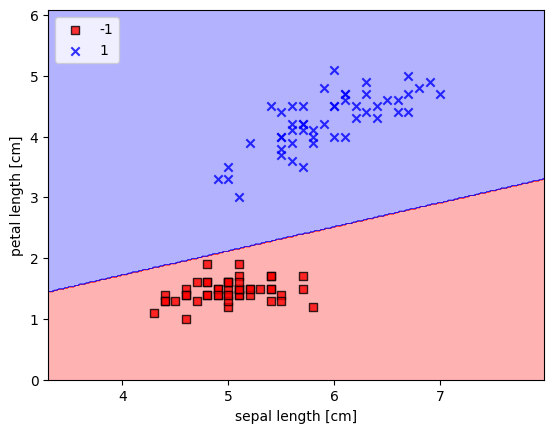

In [1053]:
five_epoch_perceptron = Perceptron(eta=.01, n_iter=5, random_state=1)
five_epoch_perceptron.fit(X, y)

plot_decision_regions(X, y, classifier=five_epoch_perceptron)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()


In [1054]:
# Grader's area

maxScore += 10
# acturalScore +=


-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 4: Changing the data order in training (15 points)**



The data arrays (X,y) currently in the memory are organized so that the all data points with a given label (e.g. 'Setosa') lie in a contiguous part of the arrays (X,y). In this question we will check the impact of changing the order of the data in the number of iterations required to learn a correct perceptron.


The commented code below needs a small change in order to generate a random shuffle (also called permutation) of the data). Please look up the particular functions of the code, see how they work and then do the required modification and uncomment/evaluate the code.

In [1055]:
# establish a random shuffle
random_indices = np.arange(len(X)) # nparray from 0 to 99 
np.random.shuffle(random_indices)  # now random indicies from 0 to 99

#shuffle sample
#X_shuffle = X[s];
#y_shuffle = y[s];
X_shuffle = [0] * len(X)
y_shuffle = [0] * len(X)

for i in range(len(X)):
    X_shuffle[i] = X[random_indices[i]] 
    y_shuffle[i] = y[random_indices[i]] 

# Convert to numpy array
X_shuffle = np.array(X_shuffle)
y_shuffle = np.array(y_shuffle)

for i in range(len(X)):
    print(f"original index {i}: \t {X[i]} \t {y[i]}")    

print("--=-=-=-=-=-=-=-==--==-=-=-=-=-")

for i in range(len(X)):
    print(f"shuffled index {i}: \t {X_shuffle[i]} \t {y_shuffle[i]}")


# Check to see if the sum between original and shuffled is the same to see if all values are present between both.
sum_of_orig_X = np.sum(X)
sum_of_orig_y = np.sum(y)
sum_of_shuffled_X = np.sum(X_shuffle)
sum_of_shuffled_y = np.sum(y_shuffle)
print(f"sum of original X: {sum_of_orig_X}")
print(f"sum of original y: {sum_of_orig_y}")
print(f"sum of shuffled X: {sum_of_shuffled_X}")
print(f"sum of shuffled y: {sum_of_shuffled_y}")


original index 0: 	 [5.1 1.4] 	 -1
original index 1: 	 [4.9 1.4] 	 -1
original index 2: 	 [4.7 1.3] 	 -1
original index 3: 	 [4.6 1.5] 	 -1
original index 4: 	 [5.  1.4] 	 -1
original index 5: 	 [5.4 1.7] 	 -1
original index 6: 	 [4.6 1.4] 	 -1
original index 7: 	 [5.  1.5] 	 -1
original index 8: 	 [4.4 1.4] 	 -1
original index 9: 	 [4.9 1.5] 	 -1
original index 10: 	 [5.4 1.5] 	 -1
original index 11: 	 [4.8 1.6] 	 -1
original index 12: 	 [4.8 1.4] 	 -1
original index 13: 	 [4.3 1.1] 	 -1
original index 14: 	 [5.8 1.2] 	 -1
original index 15: 	 [5.7 1.5] 	 -1
original index 16: 	 [5.4 1.3] 	 -1
original index 17: 	 [5.1 1.4] 	 -1
original index 18: 	 [5.7 1.7] 	 -1
original index 19: 	 [5.1 1.5] 	 -1
original index 20: 	 [5.4 1.7] 	 -1
original index 21: 	 [5.1 1.5] 	 -1
original index 22: 	 [4.6 1. ] 	 -1
original index 23: 	 [5.1 1.7] 	 -1
original index 24: 	 [4.8 1.9] 	 -1
original index 25: 	 [5.  1.6] 	 -1
original index 26: 	 [5.  1.6] 	 -1
original index 27: 	 [5.2 1.5] 	 -1
or

Modify the code below as follows: <br>
(i) Pick a sufficiently small $\eta$ so that convergences takes 20 iterations or more <br>
(ii) Add an extra line that fits the perceptron on the shuffled data <br>
(iii) Plot the error for both training processes (the original, and the shuffled ata)

What do you observe?

Number of iterations passed: 23


Weight number 		   Bias 		    w1 		      w2
Weight 0:	[-0.002247578474054701, 0.011035331727736707, -0.01293196095668454]
Weight 1:	[-0.002667578474054702, 0.009841331727736704, -0.010645960956684542]
Weight 2:	[-0.003087578474054703, 0.008551331727736701, -0.008719960956684545]
Weight 3:	[-0.0035075784740547043, 0.007213331727736699, -0.007105960956684547]
Weight 4:	[-0.003867578474054705, 0.006139331727736699, -0.005791960956684547]
Weight 5:	[-0.004227578474054706, 0.004951331727736699, -0.004975960956684545]
Weight 6:	[-0.004407578474054707, 0.004561331727736699, -0.0038959609566845427]
Weight 7:	[-0.004647578474054707, 0.0038113317277366993, -0.003121960956684541]
Weight 8:	[-0.004827578474054708, 0.0032473317277366986, -0.0024499609566845403]
Weight 9:	[-0.004947578474054708, 0.003007331727736699, -0.0018439609566845395]
Weight 10:	[-0.0051275784740547085, 0.002419331727736699, -0.001489960956684539]
Weight 11:	[-0.005187578474054709, 0.002341331

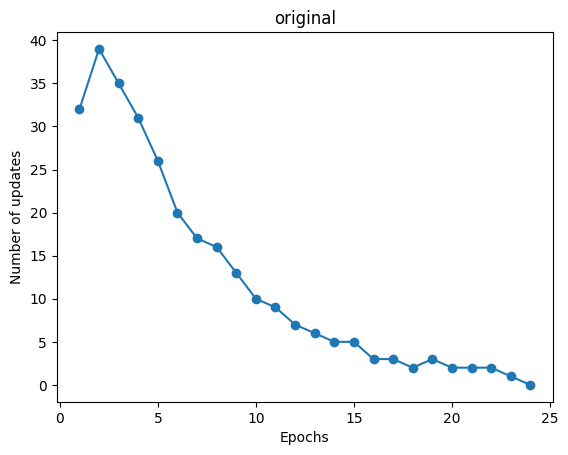

Number of iterations passed: 29


Weight number 		   Bias 		    w1 		      w2
Weight 0:	[-0.002247578474054701, 0.011035331727736707, -0.01293196095668454]
Weight 1:	[-0.002667578474054702, 0.009841331727736704, -0.010645960956684542]
Weight 2:	[-0.003087578474054703, 0.008551331727736701, -0.008719960956684545]
Weight 3:	[-0.0035075784740547043, 0.007213331727736699, -0.007105960956684547]
Weight 4:	[-0.003867578474054705, 0.006139331727736699, -0.005791960956684547]
Weight 5:	[-0.004227578474054706, 0.004951331727736699, -0.004975960956684545]
Weight 6:	[-0.004407578474054707, 0.004561331727736699, -0.0038959609566845427]
Weight 7:	[-0.004647578474054707, 0.0038113317277366993, -0.003121960956684541]
Weight 8:	[-0.004827578474054708, 0.0032473317277366986, -0.0024499609566845403]
Weight 9:	[-0.004947578474054708, 0.003007331727736699, -0.0018439609566845395]
Weight 10:	[-0.0051275784740547085, 0.002419331727736699, -0.001489960956684539]
Weight 11:	[-0.005187578474054709, 0.002341331

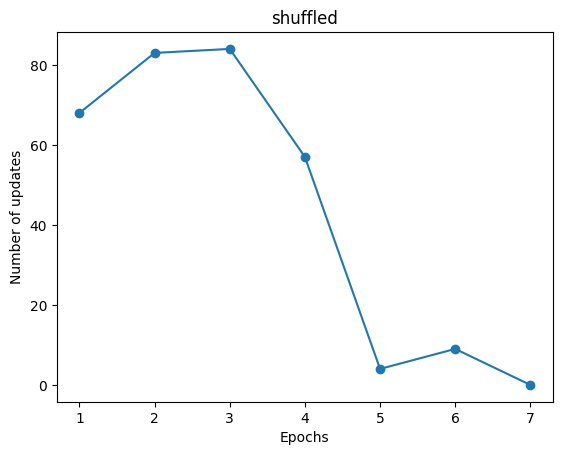

In [1056]:
ppn = Perceptron(eta=.00003, n_iter=100, random_state=2)


# original
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title("original")

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

# -=-==-=-=-=-=-=-=-==-=-=-=--=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=-=-

# shuffled
ppn.fit(X_shuffle, y_shuffle)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title("shuffled")

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

-- Give your answers here

Randomizing the data makes convergence faster! (number of epoches to converge goes from 25 to 6) but number of update also increases for each epoch.

I think this is  because in the initial dataset, one half of it has -1 as the y and the other half has 1 as the y. this means the perceptron doesnt see the 1 labels until later, which could lead to inaccurate weights in the beginning. In shuffled, it sees 1 and -1, so it updates weights accordingly.

In [1057]:
# Grader's area

maxScore += 15
# acturalScore +=

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 5: Understanding linear transformations (20 points)**

Suppose we have a 2-dimensional data set. Then we transform each data point $X_j = (X_{j,1}, X_{j,2})$ as follows: $\tilde{X_j} = ( a X_{j,1} - c, b X_{j,2}-c)$, where $a,b,c$ are constant numbers. This is a linear transformation, because our transformed data comes from simple operations that use 'first powers' of the original data.


If our given data set is linearly separable, is the same true for the transformed one? In the following cells you can plot a transformed version of the Iris dataset, so that you see how it behaves (for your choice of $a, b, c$.) But you should also try and justify your answer in a theoretical way: if there exists a  'good' perceptron for the original data set, what would be the weights for the perceptron that works on the transformed set?

Number of iterations passed: 38


Weight number 		   Bias 		    w1 		      w2
Weight 0:	[-0.002247578474054701, 0.011035331727736707, -0.01293196095668454]
Weight 1:	[-0.002667578474054702, 0.009841331727736704, -0.010645960956684542]
Weight 2:	[-0.003087578474054703, 0.008551331727736701, -0.008719960956684545]
Weight 3:	[-0.0035075784740547043, 0.007213331727736699, -0.007105960956684547]
Weight 4:	[-0.003867578474054705, 0.006139331727736699, -0.005791960956684547]
Weight 5:	[-0.004227578474054706, 0.004951331727736699, -0.004975960956684545]
Weight 6:	[-0.004407578474054707, 0.004561331727736699, -0.0038959609566845427]
Weight 7:	[-0.004647578474054707, 0.0038113317277366993, -0.003121960956684541]
Weight 8:	[-0.004827578474054708, 0.0032473317277366986, -0.0024499609566845403]
Weight 9:	[-0.004947578474054708, 0.003007331727736699, -0.0018439609566845395]
Weight 10:	[-0.0051275784740547085, 0.002419331727736699, -0.001489960956684539]
Weight 11:	[-0.005187578474054709, 0.002341331

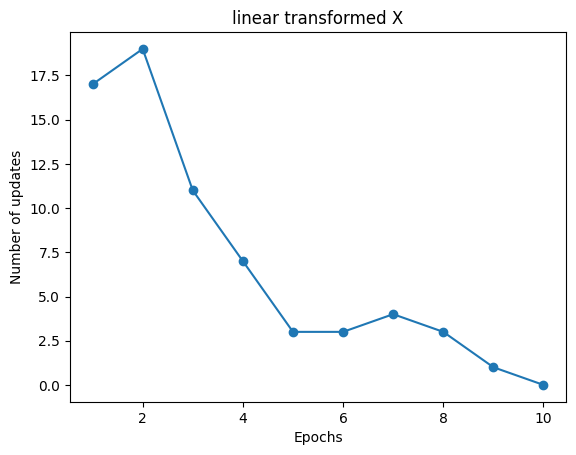

'\nthe transformed is linearly seperable since it converges.\nthe transform weights would be scaled according to the scales.\nthe bias would change according to the c term, since adding or subtracting just like the bias term.\n'

In [1058]:
a=2
b=5
c=3

X_trans = X
# transform the first features
X_trans[:,0] *= a
# transform the second features
X_trans[:,1] *= b
# transform everything
X_trans -= c

#print(X_trans)

ppn.fit(X_trans, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title("linear transformed X")

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

"""
the transformed is linearly seperable since it converges.
the transform weights would be scaled according to the scales.
the bias would change according to the c term, since adding or subtracting just like the bias term.
"""

In [1059]:
# Grader's area

maxScore += 20
# acturalScore +=


-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 6: Linear regression with numpy 1-liners (15 points)**

In [1060]:
# here we initialize a random data matrix X and random numerical labels y
import numpy as np

X = np.random.randn(10,3) # 10 entries and 3 features for each entry
y = np.random.randn(10,1) # the labels


# we also initialize a hypothetical hyperplane defined by w and b
# weights is w and bias is b
w = np.random.randn(1,3)
b = -1


In [1061]:
# (i) find the numerical labels predicted by the model (w,b) for the points in X
#     your code should be a single numpy line
#     hint: we wrote this equation for a single point x in class
#           try to generalize it by expressing everying in terms of matrices

# your code goes here

"""
for each row in X, multiply each row for the corresponding feature. Then add b. 
this gives the predicted y for the row.

the dot product between two vectors gives the sum of the sum for each individual items
"""

# predicts the first entry, now do for each entry
# y_predicted = np.dot(X[0],w[0])+b

# one liner
y_predicted = [(np.dot(X[i], w[0])+b) for i in range(len(X))]



In [1062]:
# (ii) find the updated weights after one application of gradient descent with lr = 0.1
#      your code should be a single numpy line

# find the change in y 

# calculate cost funcvtion
# calculate the gradient of cost function with respect to each parameter. 
#       (This gives you the direction and magnitude in order to reduce cost function
# update the features so the cost function is minimized.

# predicted - true
loss =  np.array(y_predicted)  -  np.squeeze(y) 
y = np.squeeze(y).tolist()

"""
Calculate the gradient using X' * loss / m
"""
X_transposed = np.transpose(X)


gradient = (1/len(X)) * (np.dot(X_transposed, (loss)))


# new_params = old_params - learning_rate * np.gradient(loss_function(old_params))
updated_weights = w - 0.1 * gradient

#new_y_predicted = [(np.dot(X[i], updated_weights[0])+b) for i in range(len(X))]

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- ONE LINER -=-=-=-=-=-=--==-=-=-=-=-=-=-=-=-=-=-
new_y_predicted = [(np.dot(X[i], (w - 0.1 * (1/len(X)) * (np.dot(np.transpose(X), (np.array(y_predicted)  -  np.squeeze(y) ))))[0])+b) for i in range(len(X))]

# test the new weights to see if it actually worked
print('\n')
print("true values")
# true values
for i,val in enumerate(y):
    print(f"Label {i}: {val}")

print('\n')
print("old prediction")
# old prediction
for i,val in enumerate(y_predicted):
    print(f"Label {i}: {val}")
    
print('\n')
print("new prediction")
# new prediction
for i, val in enumerate(new_y_predicted):
    print(f"Label {i}: {val}")






true values
Label 0: 0.7419827235153229
Label 1: -2.5039284868673914
Label 2: -0.24130510244389114
Label 3: 0.20415253012831439
Label 4: -0.062120704458730226
Label 5: -0.16545994039345013
Label 6: -0.5071292090774647
Label 7: -0.2928108651809543
Label 8: -0.506400454586612
Label 9: -2.1288824385139478


old prediction
Label 0: 0.3070847452250629
Label 1: -1.649996898041889
Label 2: 1.2861171376095353
Label 3: 1.5669327570120744
Label 4: -1.586454856697665
Label 5: -1.5024482800465049
Label 6: -1.8604714283638595
Label 7: -0.25457004709427633
Label 8: -0.3556211604657119
Label 9: 0.2507775231170981


new prediction
Label 0: 0.23007218286688258
Label 1: -1.6026966466549084
Label 2: 1.1552763623595794
Label 3: 1.4557057441858645
Label 4: -1.5006479674949575
Label 5: -1.447149627285837
Label 6: -1.743184328212184
Label 7: -0.22046957563624736
Label 8: -0.47108193354809336
Label 9: 0.08155985865921989


In [1063]:
# Grader's area

maxScore += 15
# acturalScore +=


-----------------------
-----------------------
-----------------------


In [1064]:
#Grader's area

score = actualScore*100/maxScore

NameError: name 'actualScore' is not defined